In [1]:
import itertools

import numpy as np
import pandas as pd

import altair as alt
import bokeh.io
from bokeh.layouts import row

import bebi103
import altair_catplot as altcat

bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_excel('wang_cool_gal4.xlsx')

In [36]:
df_tidy = df.stack(level=0)
# NaN eliminated by stack
df_tidy = df_tidy.sort_index(level=1)
df_tidy = df_tidy.reset_index(level=1)
df_tidy = df_tidy.rename(columns={0: 'F'})
df_tidy = df_tidy.rename(columns={'level_1': 'Condition'})
df_tidy['G'] = df_tidy.Condition.str[0:2]
df_tidy['T'] = df_tidy.Condition.str[2:]
#df_tidy = df_tidy.drop(columns = 'Condition')

In [ ]:
df_tidy

In [4]:
df_tidy = df_tidy.reset_index(drop=True)

In [ ]:
df_tidy

In [16]:
p3 = altcat.catplot(data=df_tidy.loc[df_tidy['T'] == '25',:],
               mark = 'point',
               encoding=dict(y=alt.Y('G:N', title=None, scale=alt.Scale(zero=False)),
                             x='F:Q',
                             color=alt.Color('G:N', title='G')),
                             #column=alt.Column('T:Q', title='T')),
               transform='jitterbox',
               height = 500,
               width = 500
              )

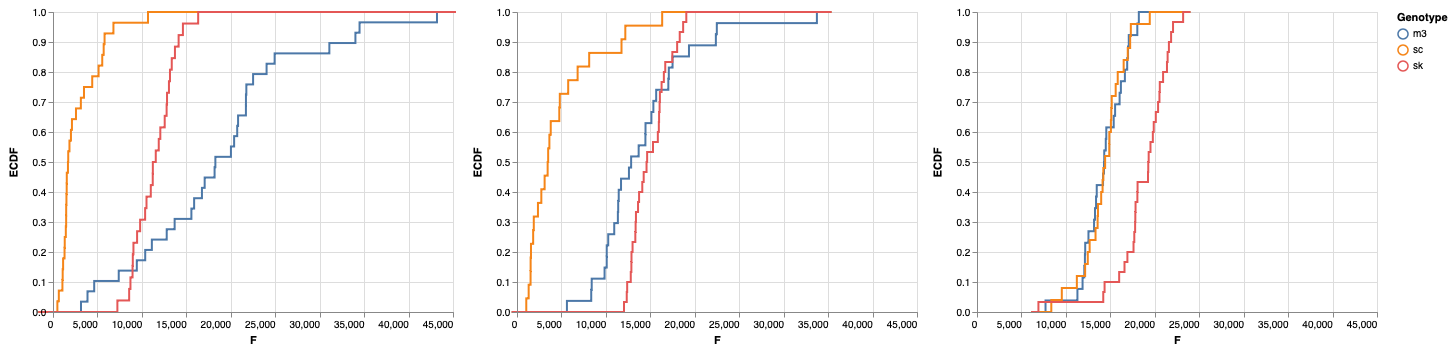

In [45]:
axis_scale = alt.Scale(domain=[0, 45000])

p1 = altcat.catplot(data=df_tidy.loc[df_tidy['T'] == '15',:],
               mark='line',
               encoding=dict(x=alt.X('F:Q',scale=axis_scale),
                             color=alt.Color('G:N', title='Genotype')),
               transform='ecdf')

p2 = altcat.catplot(data=df_tidy.loc[df_tidy['T'] == '20',:],
               mark='line',
               encoding=dict(x=alt.X('F:Q',scale=axis_scale),
                             color=alt.Color('G:N', title='Genotype')),
               transform='ecdf')

p3 = altcat.catplot(data=df_tidy.loc[df_tidy['T'] == '25',:],
               mark='line',
               encoding=dict(x=alt.X('F:Q',scale=axis_scale),
                             color=alt.Color('G:N', title='Genotype')),
               transform='ecdf')

p4 = altcat.catplot(data=df_tidy.loc[df_tidy['G'] == 'm3',:],
               mark='line',
               encoding=dict(x=alt.X('F:Q',scale=axis_scale),
                             color=alt.Color('T:O', title='Temperature')),
               transform='ecdf')

p5 = altcat.catplot(data=df_tidy.loc[df_tidy['G'] == 'sc',:],
               mark='line',
               encoding=dict(x=alt.X('F:Q',scale=axis_scale),
                             color=alt.Color('T:O', title='Temperature')),
               transform='ecdf')

p6 = altcat.catplot(data=df_tidy.loc[df_tidy['G'] == 'sk',:],
               mark='line',
               encoding=dict(x=alt.X('F:Q',scale=axis_scale),
                             color=alt.Color('T:O', title='Temperature')),
               transform='ecdf')

p1|p2|p3

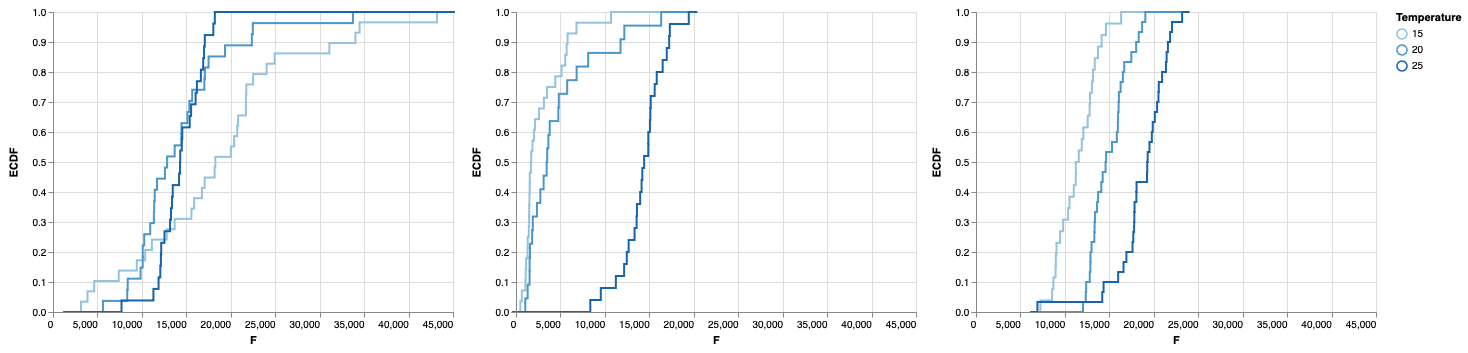

In [47]:
p4|p5|p6

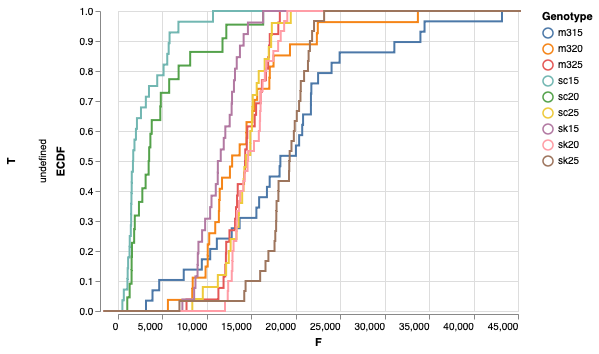

In [39]:
axis_scale = alt.Scale(domain=[0, 45000])

p1 = altcat.catplot(data=df_tidy,
               mark='line',
               encoding=dict(x=alt.X('F:Q',scale=axis_scale),
                             color=alt.Color('Condition:N', title='Genotype'))
                            #ow= alt.Row('T:N',title='T')),
               transform='ecdf')
p1

In [46]:
axis_scale = alt.Scale(domain=[0, 45000])

alt.Chart(data=df_tidy.loc[df_tidy['T'] == '15',:],
        height=150,
        width=150
    ).mark_circle(
        size=5,
        opacity=0.1
    ).encode(
        x=alt.X('F:Q', scale=axis_scale),
        y=alt.Y('F:Q', scale=axis_scale),
        color=alt.Color('G:N', title='beetle genus'),
        column=alt.Column('beetle_treatment:N', title='beetle genus'),
    )

Column({
  shorthand: 'T:Q',
  title: 'T'
})

In [15]:
def 
# Box plot
p = bebi103.viz.box(data=df_tidy.loc[df_tidy['T'] == '25',:], 
                    cats='G',
                    val='F',
                    y_axis_label=None,
                    box_kwargs={'fill_alpha': 0.2},
                    horizontal=True)

# Add jitter; note kwarg p=p to add to existing figure
p = bebi103.viz.jitter(data=df_tidy.loc[df_tidy['T'] == '25',:], 
                       cats='G',
                       val='F',
                       horizontal=True,
                       p=p)
bokeh.io.show(p)

In [168]:
p3 = altcat.catplot(data=df_tidy,
               mark = 'point',
               encoding=dict(x=alt.X('G:N', title=None),
                             y='F:Q',
                             color=alt.Color('G:N', title='G'),
                             column=alt.Column('T:Q', title='T')),
               transform='jitterbox',
               height = 200,
               width = 300
              )
p3

SchemaValidationError: Invalid specification

        altair.vegalite.v2.api.LayerChart->layer->items, validating 'anyOf'

        {'data': {'name': 'data-a2fed9a6c50a02b5391dffbd18e16022'}, 'mark': {'type': 'point'}, 'encoding': {'x': {'type': 'quantitative', 'axis': {'grid': False, 'labels': False, 'title': None, 'values': [0, 1, 2]}, 'field': '__jitter'}, 'y': {'type': 'quantitative', 'field': 'F', 'title': 'F'}, 'color': {'type': 'nominal', 'field': 'G', 'scale': {}, 'title': 'G'}, 'column': {'type': 'quantitative', 'field': 'T', 'title': 'T'}}, 'height': 200, 'width': 300} is not valid under any of the given schemas
        

LayerChart({
  layer: [LayerChart({
    layer: [Chart({
      data:    nominal_axis_value   G    middle      bottom         top  top_whisker  \
      0                 2.0  m3  14515.90  11746.2625  18142.5625   27737.0125   
      1                 0.0  sc   4816.29   1697.6040  13451.7250   19436.6300   
      2                 1.0  sk  14627.98  12786.2625  18036.0650   23189.5600   
      
         bottom_whisker  left  right  cap_left  cap_right  
      0       3149.7170   1.6    2.4       1.9        2.1  
      1        492.0972  -0.4    0.4      -0.1        0.1  
      2       6910.6730   0.6    1.4       0.9        1.1  ,
      encoding: {'x': X({
        scale: Scale({
          
        }),
        shorthand: 'nominal_axis_value:Q',
        title: None
      }), 'y': Y({
        shorthand: 'bottom_whisker:Q',
        title: 'F'
      }), 'y2': Y2({
        shorthand: 'bottom:Q'
      }), 'color': Undefined},
      height: 200,
      mark: MarkDef({
        color: 'lightgray',